# Utilities

## Imports

In [4]:
import time
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots with grey grid
sns.set(style="darkgrid")

## Test functions

In [14]:
def time_function(func, input):
    start = time.time()
    # Unpack the input list and call the function
    func(*input)
    end = time.time()
    return end - start

In [21]:
# Generate a random list of integers without repetition
def random_list(length):
    return random.sample(range(1, 10000), length)

# Exercises

## Sorting

### Exercise 1 - Intersection of arrays

Given two lists $\verb|lst1|$ and $\verb|lst2|$, compute their intersection.
For the sake of simplicity, assume the two lists have no duplicates.

#### Solution 1 - Naive

In [2]:
# Intersection of two lists
def intersection_naive(lst1, lst2):
    intersection = []
    # Let n be the length of lst1 and m be the length of lst2
    for x in lst1: # Θ(n)
        for y in lst2: # Θ(m)
            if x == y:
                intersection.append(x)
    return intersection

What is the (asymptotic) time complexity of $\verb|intersection_naive()|$?

#### Solution 2

In [6]:
# Intersection of two lists optimized
def intersection_optimized(lst1, lst2):
    intersection = []
    # Let n be the length of lst1 and m be the length of lst2
    lst1.sort() # O(n log n)
    lst2.sort() # O(m log m)
    i = j = 0
    while i < len(lst1) and j < len(lst2): # O(n + m)
        if lst1[i] == lst2[j]:
            intersection.append(lst1[i])
            i += 1
            j += 1
        elif lst1[i] < lst2[j]:
            i += 1
        else:
            j += 1
    return intersection

What is the (asymptotic) time complexity of $\verb|intersection_optimized()|$?

In [45]:
# Check the correctness of the two functions
def test():
    # Generate 100 random lists of integers of random length between 1 and 1000
    for _ in range(100):
        lst1 = random_list(random.randint(1, 1000))
        lst2 = random_list(random.randint(1, 1000))
        assert sorted(intersection_naive(lst1, lst2)) == intersection_optimized(lst1, lst2) == sorted(list(set(lst1).intersection(lst2)))

In [46]:
test()

####  Comparison

The time complexity of $\verb|intersection_naive()|$ is $O(n\cdot m)$.

The time complexity of $\verb|intersection_optimized()|$ is $O(n\log n + m\log m + n + m) = O(max(n\log n, m\log m))$.

In order to have a more clear idea of what is happening, assume for a moment that $n=m$. In this case, the complexity of $\verb|intersection_naive()|$ is $O(n^2)$, while the cost of $\verb|intersection_optimized()|$ is $O(n\log n )$.

Let's test the two implementations

In [25]:
# Test both functions on random lists of different lengths. For each length, we average over 100 runs.
lengths = range(100, 1000, 100)
naive_times = []
optimized_times = []
for length in lengths:
    # Generate random lists without repetitions
    lst1 = random_list(length)
    lst2 = random_list(length)
    naive_time = 0
    optimized_time = 0
    for _ in range(100):
        naive_time += time_function(intersection_naive, [lst1, lst2])
        optimized_time += time_function(intersection_optimized, [lst1, lst2])
    naive_times.append(naive_time / 100)
    optimized_times.append(optimized_time / 100)

In [26]:
# Rescale the times to milliseconds
naive_times = [t * 1e3 for t in naive_times]
optimized_times = [t * 1e3 for t in optimized_times]

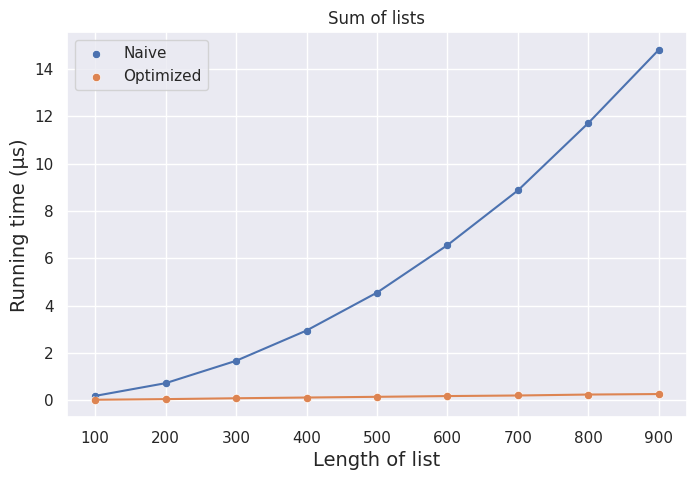

In [27]:
# Plot the time taken for the two functions
plt.figure(figsize=(8, 5))

sns.scatterplot(x=lengths, y=naive_times, label='Naive')
sns.scatterplot(x=lengths, y=optimized_times, label='Optimized')
sns.lineplot(x=lengths, y=naive_times)
sns.lineplot(x=lengths, y=optimized_times)

plt.title('Sum of lists')

plt.xlabel('Length of list', size=14)
plt.ylabel('Running time (μs)', size=14)

plt.legend()

plt.show()

Plot Optimized version alone

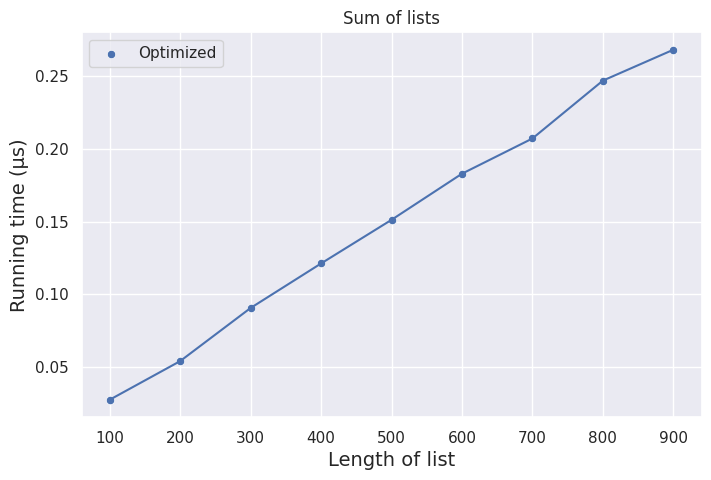

In [47]:
# Plot the time taken for the two functions
plt.figure(figsize=(8, 5))

sns.scatterplot(x=lengths, y=optimized_times, label='Optimized')
sns.lineplot(x=lengths, y=optimized_times)

plt.title('Sum of lists')

plt.xlabel('Length of list', size=14)
plt.ylabel('Running time (μs)', size=14)

plt.legend()

plt.show()

Take-home messages:
- Sort is useful for many application other than for just sorting things
- The right implementation makes the difference

## Binary Search

### Exercise 2 - Square Root

Given a non-negative integer $n$, return the square root of $n$ rounded down to the nearest integer. The returned integer should be non-negative as well.

You must not use any built-in exponent function or operator like, for instance, $n$ ** $0.5$.

In [16]:
# Compute square root of integer
def my_sqrt(n):
    if not isinstance(n, int) or n < 0: # Check if n is a positive integer
        raise TypeError('n must be a non-negative integer')
    if n == 0 or n == 1:
        return n
    left, right = 1, n
    # Perform a Binary Search in the range [1, n]
    while left <= right: # O(log n)
        mid = (left + right) // 2
        if mid * mid == n:
            return mid
        elif mid * mid < n:
            left = mid + 1
        else:
            right = mid - 1
    return right

In [17]:
# Test the function on 1000 random integers between 0 and 1,000,000
for i in range(1000):
    n = random.randint(0, 1000000)
    assert my_sqrt(n) == int(n ** 0.5)